In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/drive/MyDrive/BigMartSalesDataset/train.csv')

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6210,NCT06,17.100,Low Fat,0.038730,Household,166.2842,OUT035,2004,Small,Tier 2,Supermarket Type1,4807.7418
3895,NCK05,20.100,Low Fat,0.000000,Health and Hygiene,61.3536,OUT010,1998,NaN,Tier 3,Grocery Store,183.7608
6400,FDT43,16.350,Low Fat,0.034393,Fruits and Vegetables,50.8324,OUT010,1998,NaN,Tier 3,Grocery Store,155.7972
4930,FDS34,NaN,Regular,0.076387,Snack Foods,112.1518,OUT027,1985,Medium,Tier 3,Supermarket Type3,3870.9612
8479,FDL10,8.395,Low Fat,0.039554,Snack Foods,99.1042,OUT049,1999,Medium,Tier 1,Supermarket Type1,2579.3092


In [6]:
data.shape

(8523, 12)

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
per = data.isnull().sum()*100/len(data)
print(per)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [10]:
data.duplicated().any()

False

In [11]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [12]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [13]:
mean_weight=data['Item_Weight'].mean()
median_weight=data['Item_Weight'].median()

In [14]:
print(f"Mean:{mean_weight}   Median:{median_weight}")

Mean:12.857645184135976   Median:12.6


In [15]:
data['Item_Weight_mean']=data['Item_Weight'].fillna(mean_weight)

In [16]:
print(data['Item_Weight_mean'])

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight_mean, Length: 8523, dtype: float64


In [17]:
data['Item_Weight_median']=data['Item_Weight'].fillna(median_weight)

In [19]:
data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,9.3


In [20]:
print("Original Weight variable variance",data['Item_Weight'].var())
print("Item Weight variance after mean imputation",data['Item_Weight_mean'].var())
print("Item Weight variance after median imputation",data['Item_Weight_median'].var())

Original Weight variable variance 21.561688259836558
Item Weight variance after mean imputation 17.86012173506058
Item Weight variance after median imputation 17.869561454073647


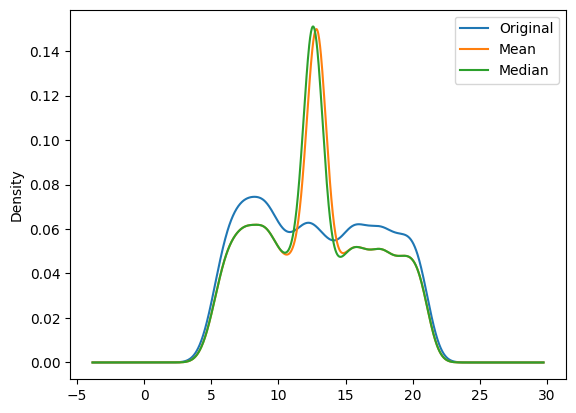

In [21]:
data['Item_Weight'].plot(kind = "kde", label = "Original")
data['Item_Weight_mean'].plot(kind = "kde", label = "Mean")
data['Item_Weight_median'].plot(kind = "kde", label = "Median")

plt.legend()
plt.show()

<Axes: >

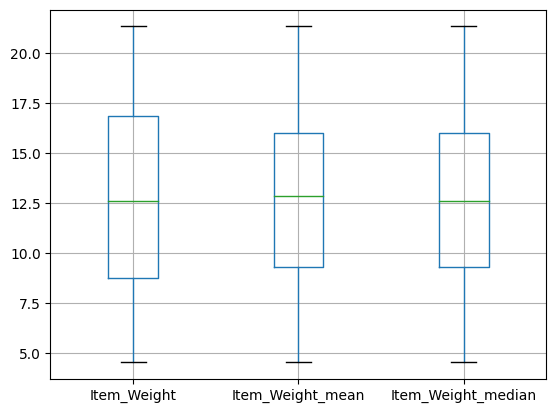

In [22]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

In [23]:
data['Item_Weight_interpolate'] = data['Item_Weight'].interpolate(method="linear")

In [24]:
print(data['Item_Weight_interpolate'])

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight_interpolate, Length: 8523, dtype: float64


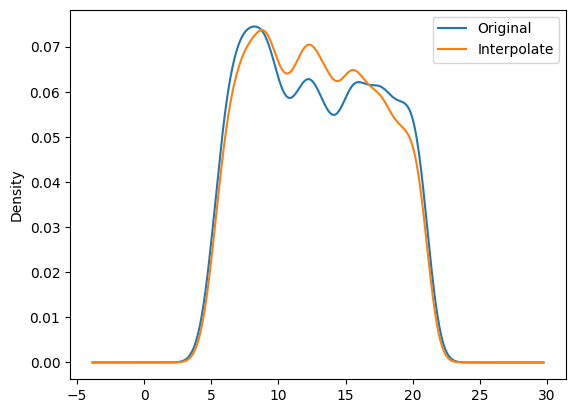

In [25]:
data['Item_Weight'].plot(kind = "kde", label = "Original")
data['Item_Weight_interpolate'].plot(kind = "kde", label = "Interpolate")

plt.legend()
plt.show()

In [26]:
from sklearn.impute import KNNImputer

In [27]:
knn = KNNImputer(n_neighbors=10, weights= "distance")

In [28]:
data['knn_imputer'] = knn.fit_transform(data[['Item_Weight']]).ravel()

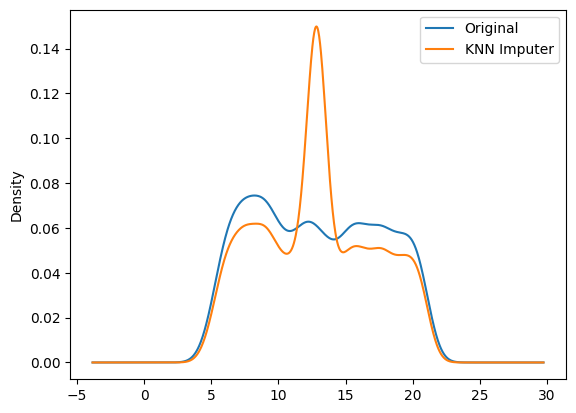

In [29]:
data['Item_Weight'].plot(kind = "kde", label = "Original")
data['knn_imputer'].plot(kind = "kde", label = "KNN Imputer")

plt.legend()
plt.show()

In [30]:
data = data.drop(['Item_Weight', 'Item_Weight_mean', 'Item_Weight_median', 'knn_imputer'], axis =1)

In [31]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


In [32]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interpolate         0
dtype: int64

In [33]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [34]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [35]:
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc= (lambda x:x.mode()[0]))

In [36]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [37]:
missing_values = data['Outlet_Size'].isnull()

In [38]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [39]:
data.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_outlet[x])

In [40]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interpolate      0
dtype: int64

In [41]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolate'],
      dtype='object')

In [42]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [43]:
data.replace({'Item_Fat_Content': {'LF':'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular' }},inplace=True)

In [44]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [45]:
data['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [46]:
data['Item_Visibility_interpolate'] = data['Item_Visibility'].replace(0,np.nan).interpolate(method = 'linear')

In [47]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [48]:
data['Item_Visibility_interpolate'].value_counts()

0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: Item_Visibility_interpolate, Length: 8405, dtype: int64

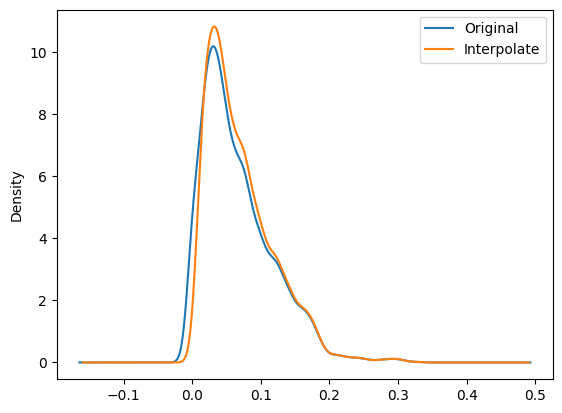

In [49]:
data['Item_Visibility'].plot(kind="kde", label = "Original")
data['Item_Visibility_interpolate'].plot(kind="kde", label = "Interpolate")

plt.legend()
plt.show()

In [50]:
data = data.drop('Item_Visibility', axis=1)

In [51]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate
0,FDA15,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [52]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [53]:
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [54]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x : x[:2])

In [55]:
data['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [58]:
data['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [59]:
import datetime as dt

In [60]:
current_year = dt.datetime.today().year

In [61]:
current_year

2023

In [62]:
data['Outlet_age'] = current_year - data['Outlet_Establishment_Year']

In [63]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_age
0,FD,Low Fat,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047,24


In [64]:
data = data.drop('Outlet_Establishment_Year', axis=1)

In [66]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_age
0,FD,Low Fat,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,24
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,14
2,FD,Low Fat,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,24
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,25
4,NC,Low Fat,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,36


In [67]:
from sklearn.preprocessing import OrdinalEncoder
data_encoded = data.copy()
cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
  oe = OrdinalEncoder()
  data_encoded[col]=oe.fit_transform(data_encoded[[col]])
  print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['Low Fat', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [68]:
data_encoded.head(3)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,24
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,14
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,24


In [69]:
x = data_encoded.drop('Item_Outlet_Sales', axis=1)
y = data_encoded['Item_Outlet_Sales']

In [71]:
x

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.300,0.016047,24
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.920,0.019278,14
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.500,0.016760,24
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,19.200,0.015755,25
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,8.930,0.014751,36
...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,0.0,13.0,214.5218,1.0,0.0,2.0,1.0,6.865,0.056783,36
8519,1.0,1.0,0.0,108.1570,7.0,2.0,1.0,1.0,8.380,0.046982,21
8520,2.0,0.0,8.0,85.1224,6.0,2.0,1.0,1.0,10.600,0.035186,19
8521,1.0,1.0,13.0,103.1332,3.0,1.0,2.0,2.0,7.210,0.145221,14


In [72]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf,x,y,cv=5,scoring='r2')
print(scores.mean())

0.555040442702387


In [74]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(xg,x,y,cv=5,scoring='r2')
print(scores.mean())

0.5955270459526943


In [75]:
xg = XGBRFRegressor(n_estimators=100, random_state=42)
xg1 = xg.fit(x,y)
pd.DataFrame({
    'feature':x.columns,
    'XGBRF_importance': xg1.feature_importances_
}).sort_values(by='XGBRF_importance', ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.428726
10,Outlet_age,0.154613
3,Item_MRP,0.143704
5,Outlet_Size,0.136857
4,Outlet_Identifier,0.118608
6,Outlet_Location_Type,0.008615
9,Item_Visibility_interpolate,0.002940
8,Item_Weight_interpolate,0.002302
2,Item_Type,0.001865
0,Item_Identifier,0.001068


In [76]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_interpolate',
       'Item_Visibility_interpolate', 'Outlet_age'],
      dtype='object')

In [ ]:
['Item_Visibility_interpolate','Item_Weight_interpolate','Item_Type',
 'Outlet_Location_Type','Item_Identifier','Item_Fat_Content']

In [77]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(xg1,x.drop(['Item_Visibility_interpolate','Item_Weight_interpolate','Item_Type',
 'Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5961723971108985


In [78]:
final_data = x.drop(columns=['Item_Visibility_interpolate','Item_Weight_interpolate','Item_Type',
 'Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)

In [79]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,24
1,48.2692,3.0,1.0,2.0,14
2,141.6180,9.0,1.0,1.0,24
3,182.0950,0.0,2.0,0.0,25
4,53.8614,1.0,0.0,1.0,36
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,36
8519,108.1570,7.0,2.0,1.0,21
8520,85.1224,6.0,2.0,1.0,19
8521,103.1332,3.0,1.0,2.0,14


In [80]:
from xgboost import XGBRFRegressor

In [81]:
xg_final =XGBRFRegressor()

In [82]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [84]:
x_train,x_test,y_train,y_test = train_test_split(final_data,y,test_size=0.20,random_state=42)

In [85]:
xg_final.fit(x_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [86]:
y_pred = xg_final.predict(x_test)

In [87]:
mean_absolute_error(y_test,y_pred)

714.5479888800818

In [91]:
pred = xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]

In [92]:
pred

2049.1736

In [93]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1334.753583984375 and 2763.593583984375


In [94]:
import joblib

In [95]:
joblib.dump(xg_final, 'bigmart_model')

['bigmart_model']

In [99]:
model = joblib.load('bigmart_model')

In [101]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
pred

2049.1736

In [102]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 1334.753583984375 and 2763.593583984375
